## pCMV-ACBEmax construction
The ACBEmax plsmid (pCMV-ACBEmax) was constructed by assembling an ABEmax fragment obtained from pCMV-Target-ACEmax using SI447/SI1105 with the three fragments encoding the rAPOBEC1 domain, 2×UGI domain, and the two backbone fragments that were prepared to construct pCMV-BE4max(C).

In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
QUEEN(record="output/pCMV-Target-ACEmax.gbk", product="pCMV_Target_ACEmax") 
QUEEN(record="output/pCMV-BE4max(C).gbk", product="pCMV_BE4maxC")

<queen.QUEEN object; project='pCMV_BE4maxC', length='9094 bp', topology='circular'>

In [4]:
quine(pCMV_BE4maxC, execution=True)
source = pCMV_BE4maxC.productdict
for key in source:
    print(source[key])

The quine code correctly reconstructed the given QUEEN object.
<queen.QUEEN object; project='pCMV_Target_ACEmax', length='9913 bp', topology='circular'>
<queen.QUEEN object; project='pCMV_BE4maxC', length='9094 bp', topology='circular'>
<queen.QUEEN object; project='pCMV_BE4max', length='8961 bp', topology='circular'>
<queen.QUEEN object; project='pCMV_ABEmax', length='8811 bp', topology='circular'>
<queen.QUEEN object; project='opt_CDA1_ugi', length='3874 bp', topology='circular'>
<queen.QUEEN object; project='SI1308', length='45 bp', sequence='ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT', topology='linear'>
<queen.QUEEN object; project='SI1305', length='25 bp', sequence='GTCACCTCCCAGCTGAGACAGGTCG', topology='linear'>
<queen.QUEEN object; project='extract6', length='4053 bp', topology='linear'>
<queen.QUEEN object; project='fragment6', length='4123 bp', topology='linear'>
<queen.QUEEN object; project='SI1304', length='45 bp', sequence='CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG',

In [5]:
processname1 = "PCR"
description1 = "An ABEmax fragment (fragment14) obtained from pCMV-Target-ACEmax using SI447/SI1105."
QUEEN(seq="GCCACATAGCAGAACTTTAAAAGTG", product="SI447")
QUEEN(seq="CTTGTCATCGTCATCCTTGTA", product="SI1105")
pCMV_Target_ACEmax.searchsequence(SI447.seq[-18:],  product="FW14", pn=processname1, pd=description1)
pCMV_Target_ACEmax.searchsequence(SI1105.seq[-18:], product="RV14", pn=processname1, pd=description1)
cropdna(pCMV_Target_ACEmax, FW14[0].end, RV14[0].start, product="extract14", pn=processname1, pd=description1)
modifyends(extract14, SI447.seq, SI1105.rcseq, product="fragment14", pn=processname1, pd=description1)

<queen.QUEEN object; project='fragment14', length='6878 bp', topology='linear'>

In [6]:
processname2 = "Gibson Assembly"
description2 = "The ACBEmax plasmid (pCMV-ACBEmax) was constructed by assembling the ABEmax fragment \
with the three fragments encoding the rAPOBEC1 domain, 2×UGI domain, and the backbone fragment."
modifyends(source["fragment10"], "*{15}/-{15}","-{24}/*{24}", product="fragment10_mod", pn=processname2, pd=description2)
modifyends(source["fragment11"], "*{24}/-{24}","-{26}/*{26}", product="fragment11_mod", pn=processname2, pd=description2)
modifyends(source["fragment12"], "*{26}/-{26}","-{25}/*{25}", product="fragment12_mod", pn=processname2, pd=description2)
modifyends(fragment14, "*{25}/-{25}","-{15}/*{15}", product="fragment14_mod", pn=processname2, pd=description2)
joindna(fragment10_mod, fragment11_mod, fragment12_mod, fragment14_mod, topology="circular", product="pCMV_ACBEmax", pn=processname2, pd=description2)

<queen.QUEEN object; project='pCMV_ACBEmax', length='10282 bp', topology='circular'>

In [7]:
pCMV_ACBEmax.printfeature()

feature_id  feature_type  qualifier:label         start  end    strand  
1           source        source                  0      776    +       
100         misc_feature  fragment-8              0      1241   +       
3600        CDS           AmpR                    9574   153    -       
200         promoter      AmpR promoter           153    258    -       
300         primer_bind   pRS-marker              336    356    -       
400         enhancer      CMV enhancer            527    907    +       
500         source        source                  776    6505   +       
600         promoter      CMV promoter            907    1111   +       
700         primer_bind   CMV-F                   1061   1082   +       
800         misc_feature  fragment-13             1138   6530   +       
900         promoter      T7 promoter             1152   1171   +       
1000        CDS           SV40 NLS                1220   1241   +       
1100        CDS           ecTadA(wt)              1

In [8]:
#Verification of quine code
quine(pCMV_ACBEmax, execution=True)

The quine code correctly reconstructed the given QUEEN object.


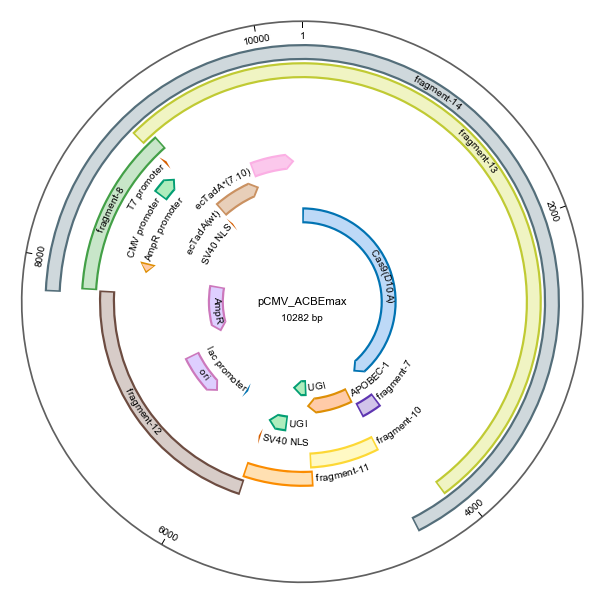

In [9]:
#Visuailze annotated sequence map
list600  = ["#E53935","#D81B60","#8E24AA","#5E35B1","#3949AB","#1E88E5","#039BE5","#00ACC1","#00897B","#43A047","#7CB342","#C0CA33","#FDD835","#FFB300","#FB8C00","#F4511E","#6D4C41","#546E7A"]
list100  = ["#ffcdd2","#f8bbd0","#e1bee7","#d1c4e9","#c5cae9","#bbdefb","#b3e5fc","#b2ebf2","#b2dfdb","#c8e6c9","#dcedc8","#f0f4c3","#fff9c4","#ffecb3","#ffe0b2","#ffccbc","#d7ccc8","#cfd8dc"]
color_sets = list(zip(list600,list100))
color_sets = [color_sets[0], color_sets[2], color_sets[4], color_sets[5], color_sets[7], color_sets[1], color_sets[3], color_sets[9], color_sets[10], color_sets[12], color_sets[14], color_sets[16], color_sets[11], color_sets[17]]

def add_fragment_annotation(dna, fragment, fragment_id, color_set):
    f = dna.searchsequence(fragment.seq)
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute("f{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:label", operation=createattribute("fragment-{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="strand", operation=replaceattribute(0), new_copy=False)

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")
    plasmid = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular") 
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+")
    for i in range(len(fragments)):
        fragments[i].location.strand = 0
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments
    fig       = visualizedna(plasmid, feature_list=features, map_view="circular", tick_space=2000, title=dna.project)
    return fig

add_fragment_annotation(pCMV_ACBEmax, source["fragment10"], "10", color_sets[9])
add_fragment_annotation(pCMV_ACBEmax, source["fragment11"], "11", color_sets[10])
add_fragment_annotation(pCMV_ACBEmax, source["fragment12"], "12", color_sets[11])
add_fragment_annotation(pCMV_ACBEmax, fragment14, "14", color_sets[13])
fig = visualization(pCMV_ACBEmax)

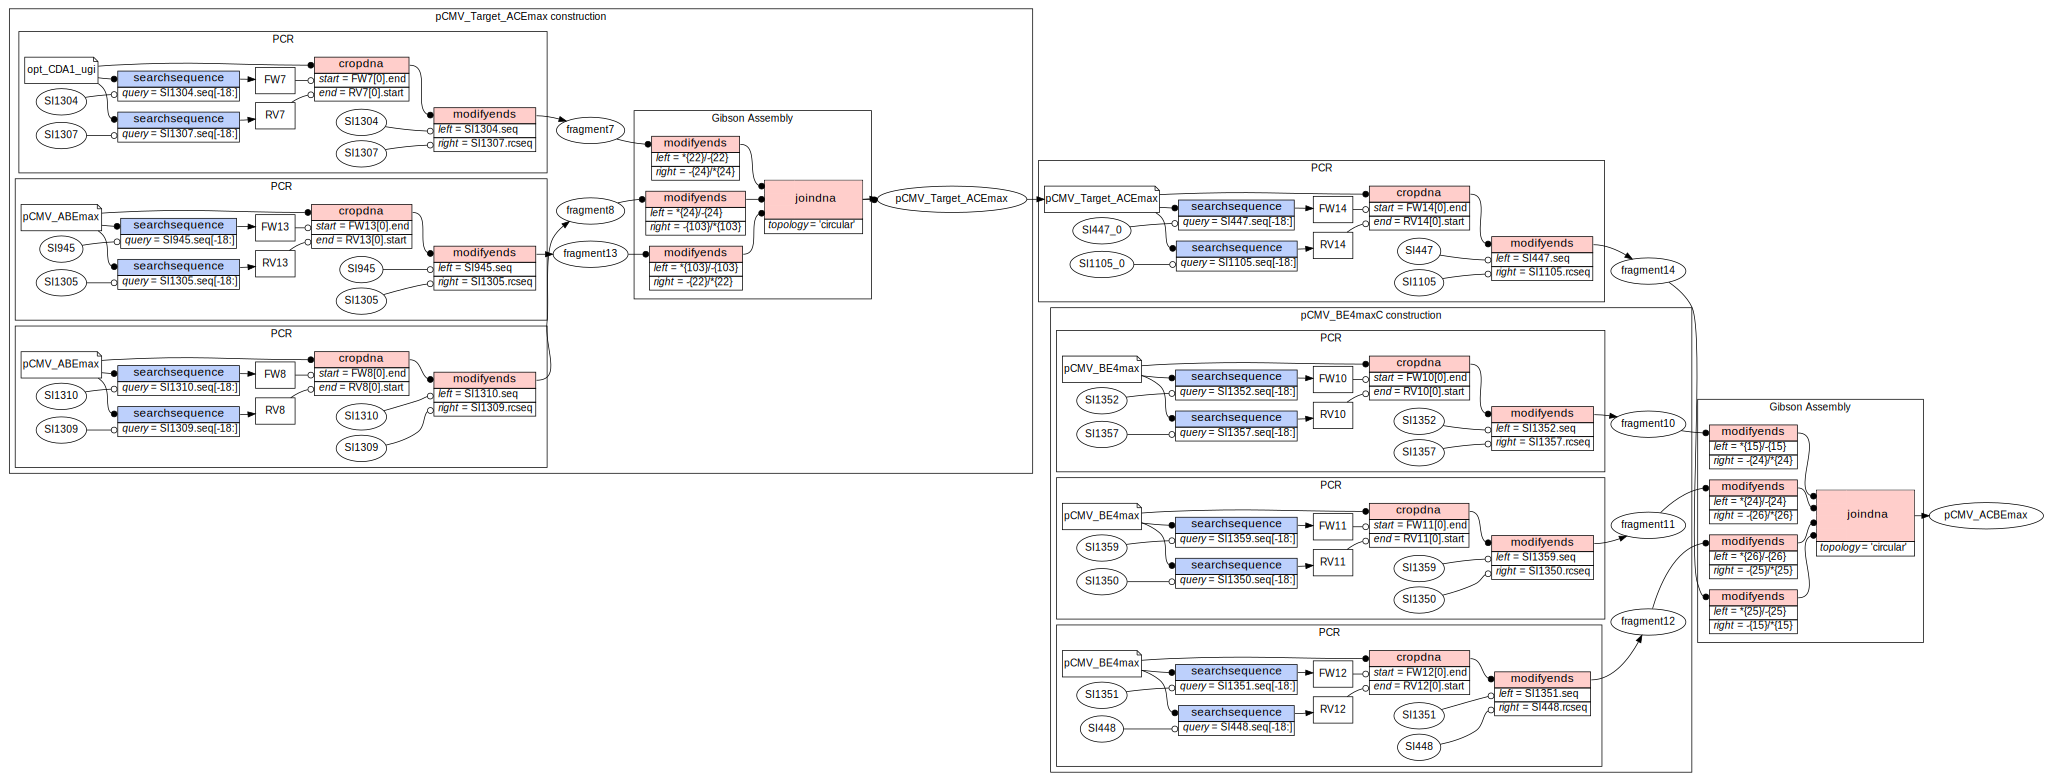

In [10]:
flow = visualizeflow(pCMV_ACBEmax)
flow.render("output/pCMV_ACBEmax_construction")
flow

In [11]:
pCMV_ACBEmax.writedna("output/pCMV-ACBEmax_v2.gbk")